In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
df = pd.read_csv('Datasets\deptos_en_limpieza.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26189 entries, 0 to 26201
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    26189 non-null  int64  
 1   monto                 26189 non-null  int64  
 2   ppm2                  26184 non-null  float64
 3   superficie_t          26189 non-null  float64
 4   superficie_u          25958 non-null  float64
 5   terraza               26189 non-null  float64
 6   dormitorios           26189 non-null  int32  
 7   banos                 26189 non-null  int64  
 8   estacionamiento       26189 non-null  int64  
 9   bodegas               26189 non-null  int64  
 10  cantidad_pisos        16146 non-null  float64
 11  piso                  16103 non-null  float64
 12  tipo_depto            26189 non-null  object 
 13  antiguedad            26189 non-null  int64  
 14  latitud               26189 non-null  float64
 15  longitud              26

In [29]:
df['dormitorios'].unique()

array([2, 3, 5, 4, 1, 6, 7, 8])

C:\Users\Pc-ADS\AppData\Local\Temp\ipykernel_4480\4278248978.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_labels, y=frecuencia_dormitorios.values, palette='viridis')


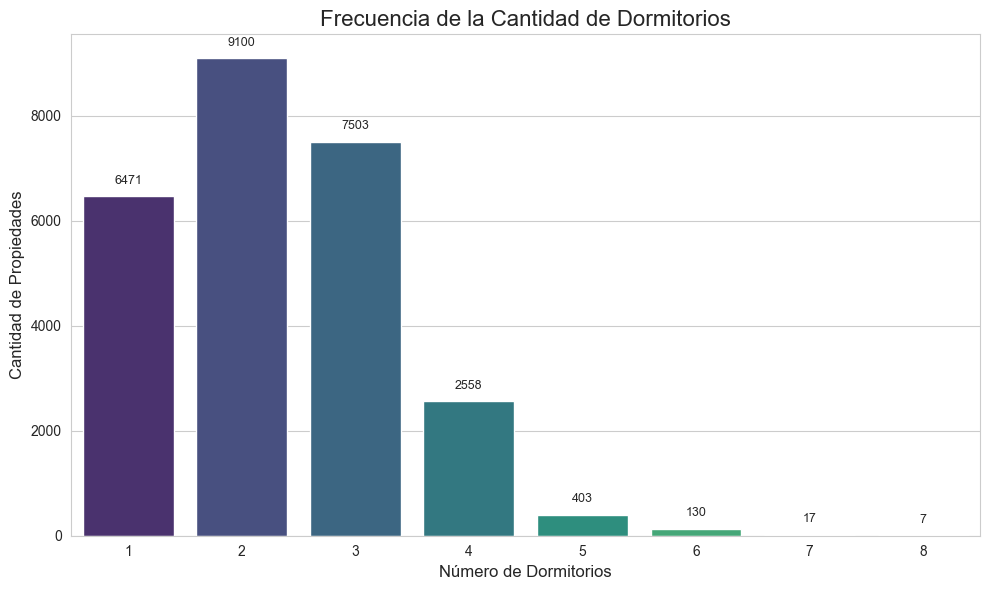

In [27]:
frecuencia_dormitorios = df['dormitorios'].value_counts(dropna=False).sort_index()

# 2. Configurar el estilo del gráfico para una mejor apariencia
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6)) # Un tamaño estándar debería ser suficiente

# 3. Crear el gráfico de barras
# Preparamos las etiquetas del eje X para manejar los NaN como cadena 'NaN'
x_labels = [str(int(val)) if pd.notna(val) else 'NaN' for val in frecuencia_dormitorios.index]

sns.barplot(x=x_labels, y=frecuencia_dormitorios.values, palette='viridis')

# 4. Añadir títulos y etiquetas
plt.title('Frecuencia de la Cantidad de Dormitorios', fontsize=16)
plt.xlabel('Número de Dormitorios', fontsize=12)
plt.ylabel('Cantidad de Propiedades', fontsize=12)

# 5. Añadir los valores exactos encima de cada barra para mayor claridad
for index, value in enumerate(frecuencia_dormitorios.values):
    plt.text(index, value + (frecuencia_dormitorios.max() * 0.02), str(value), ha='center', va='bottom', fontsize=9)

# 6. Ajustar el diseño y mostrar el gráfico
plt.tight_layout() # Ajusta automáticamente los parámetros del plot para un layout ajustado
plt.show()

In [19]:
valores_a_inspeccionar = [20, 32, 36]

# Filtrar el DataFrame para obtener las filas con esos valores de baños
# Usamos .isin() para filtrar por múltiples valores
filas_para_revision = df[df['dormitorios'].isin(valores_a_inspeccionar)]

print(filas_para_revision[['id', 'dormitorios', 'superficie_t', 'banos', 'comuna', 'calle',  'monto']].to_string())

               id  dormitorios  superficie_t  banos      comuna                     calle  monto
2768   2784631270        36.00         70.00      2  San Miguel        Avenida Centenario   3400
19061  2830702182        20.00         69.00      2  San Miguel  Centenario De San Miguel   3400
22747  2778071938        32.00         65.00      2  Huechuraba         Alberto Undurraga   3450
24171  2796475968        20.00         38.00      1    Santiago              Nataniel Cox   1990


In [16]:
ids_a_eliminar = [
    1567970801, 2807844530, 2833848848, 2855335980, 2825433628, 2845591572, 2861501528,
    2765171396, 1575195467, 1536818015, 2835953618, 2852976890, 2843320282
]

# --- Paso 2: Eliminar las filas con los IDs especificados ---
# Usamos el operador de negación (~) con .isin() para mantener todas las filas EXCEPTO las que tienen esos IDs.
initial_rows = len(df)
df = df[~df['id'].isin(ids_a_eliminar)].copy() # .copy() para evitar SettingWithCopyWarning


In [20]:
df['dormitorios'] = df['dormitorios'].replace(36, 3)
print("Valor de '36' dormitorios corregido a '3'.")

# --- Paso 2: Reemplazar los valores específicos de 20 y 32 dormitorios por 2 ---
# Usamos un diccionario para reemplazar múltiples valores a uno solo.
df['dormitorios'] = df['dormitorios'].replace({20: 2, 32: 2})
print("Valores de '20' y '32' dormitorios corregidos a '2'.")

Valor de '36' dormitorios corregido a '3'.
Valores de '20' y '32' dormitorios corregidos a '2'.


In [23]:
df['dormitorios_faltante'] = df['dormitorios'].isna().astype(int)

In [24]:
mediana_dormitorios = df['dormitorios'].median()

# Rellenar los valores NaN en 'dormitorios' con la mediana calculada
df['dormitorios'] = df['dormitorios'].fillna(mediana_dormitorios)

In [25]:
df['dormitorios'] = df['dormitorios'].round(0)

# Convertir la columna 'dormitorios' a tipo entero (int)
# Esto es seguro ahora que no hay NaNs y todos son números enteros o se han redondeado.
df['dormitorios'] = df['dormitorios'].astype(int)

In [30]:
df['dormitorios'].unique()

array([2, 3, 5, 4, 1, 6, 7, 8])

In [31]:
df.to_csv('Datasets\deptos_en_limpieza.csv', index=False)

### Justificación de las Operaciones en la Columna 'Dormitorios'
La columna dormitorios fue sometida a un proceso de limpieza y preparación enfocado en garantizar la coherencia de los datos y su valor predictivo. Inicialmente, se eliminaron registros específicos identificados como atípicos (como edificios completos o duplicados problemáticos, confirmados tras una revisión manual de sus IDs), asegurando que el dataset represente únicamente departamentos. Posteriormente, se corrigieron valores erróneos que, por su magnitud y el contexto de otras características del inmueble (como metraje y número de baños), se determinó que eran errores de tecleo (ej. 36 a 3, o 20/32 a 2). Esta corrección informada permite recuperar datos valiosos que de otro modo serían considerados inválidos. Finalmente, para manejar los valores faltantes, se aplicó la misma estrategia usada en otras columnas: imputación con la mediana y creación de una columna indicadora (dormitorios_faltante). Este enfoque preserva la totalidad de los datos, evita suposiciones incorrectas (como "cero dormitorios" para un NaN), y capacita al modelo para aprender si la ausencia de esta información original tiene un peso específico en la predicción del precio.